# Temperature versus depth for present-day subducting slabs

This notebook uses the results of a study by Syracuse et al (PEPI, 2010) to illustrate the modelled depth to the Curie isotherm for 55 locations along the present-day subduction zones. The Curie isotherm (assuming a value of 550 deg-C) is plotted to give a first-order indication of how deep the magnetisation may be in each region, and how much it varies between regions.

The range of locations considered by Syracuse et al (2010) is shown here:



In [1]:
from IPython.display import Image
Image('/Users/Andrew/Documents/PhD/Data/syracuse_thermal/Syracuse++_2010_Figure1.png')

FileNotFoundError: No such file or directory: '/Users/Andrew/Documents/PhD/Data/syracuse_thermal/Syracuse++_2010_Figure1.png'

FileNotFoundError: No such file or directory: '/Users/Andrew/Documents/PhD/Data/syracuse_thermal/Syracuse++_2010_Figure1.png'

<IPython.core.display.Image object>

For each of the points plotted, they constructed 4 alternative models for the temperature field. Here is one example, for Alaska.

In [2]:
from IPython.display import Image
Image('/Users/Andrew/Documents/PhD/Data/syracuse_thermal/Syracuse++_2010_Figure5.png')

FileNotFoundError: No such file or directory: '/Users/Andrew/Documents/PhD/Data/syracuse_thermal/Syracuse++_2010_Figure5.png'

FileNotFoundError: No such file or directory: '/Users/Andrew/Documents/PhD/Data/syracuse_thermal/Syracuse++_2010_Figure5.png'

<IPython.core.display.Image object>

Note the dotted lines on the above figure. These lines define the 'surface' and 'moho' for the crust of the slab (assumed 7 km apart based on average thickness of oceanic crust). 

The supplementary material from the Syracuse et al (2010) paper gives the temeperature along these two horizons for each of the 4 models, and for each of the 55 subduction zone sites. The code below reads in the files for one of these model (options are D30, X25, W1300, T550) and plots them. Colours along each line are mapped to depth.

[TODO Add colour legend bar along bottom]

Also plotted are horizontal lines to illustrate depths to the 550 deg-C contour for each slab. There are two lines for each plot; red is the depth to the 550 deg-C contour on the slab surface, blue is for the slab moho
[TODO these lines seem to be wrong, need to figure out why]

In each file there are five columns:

key | distance from trench on earth surface | depth | temperature

with key been 0/7 for top of slab/moho

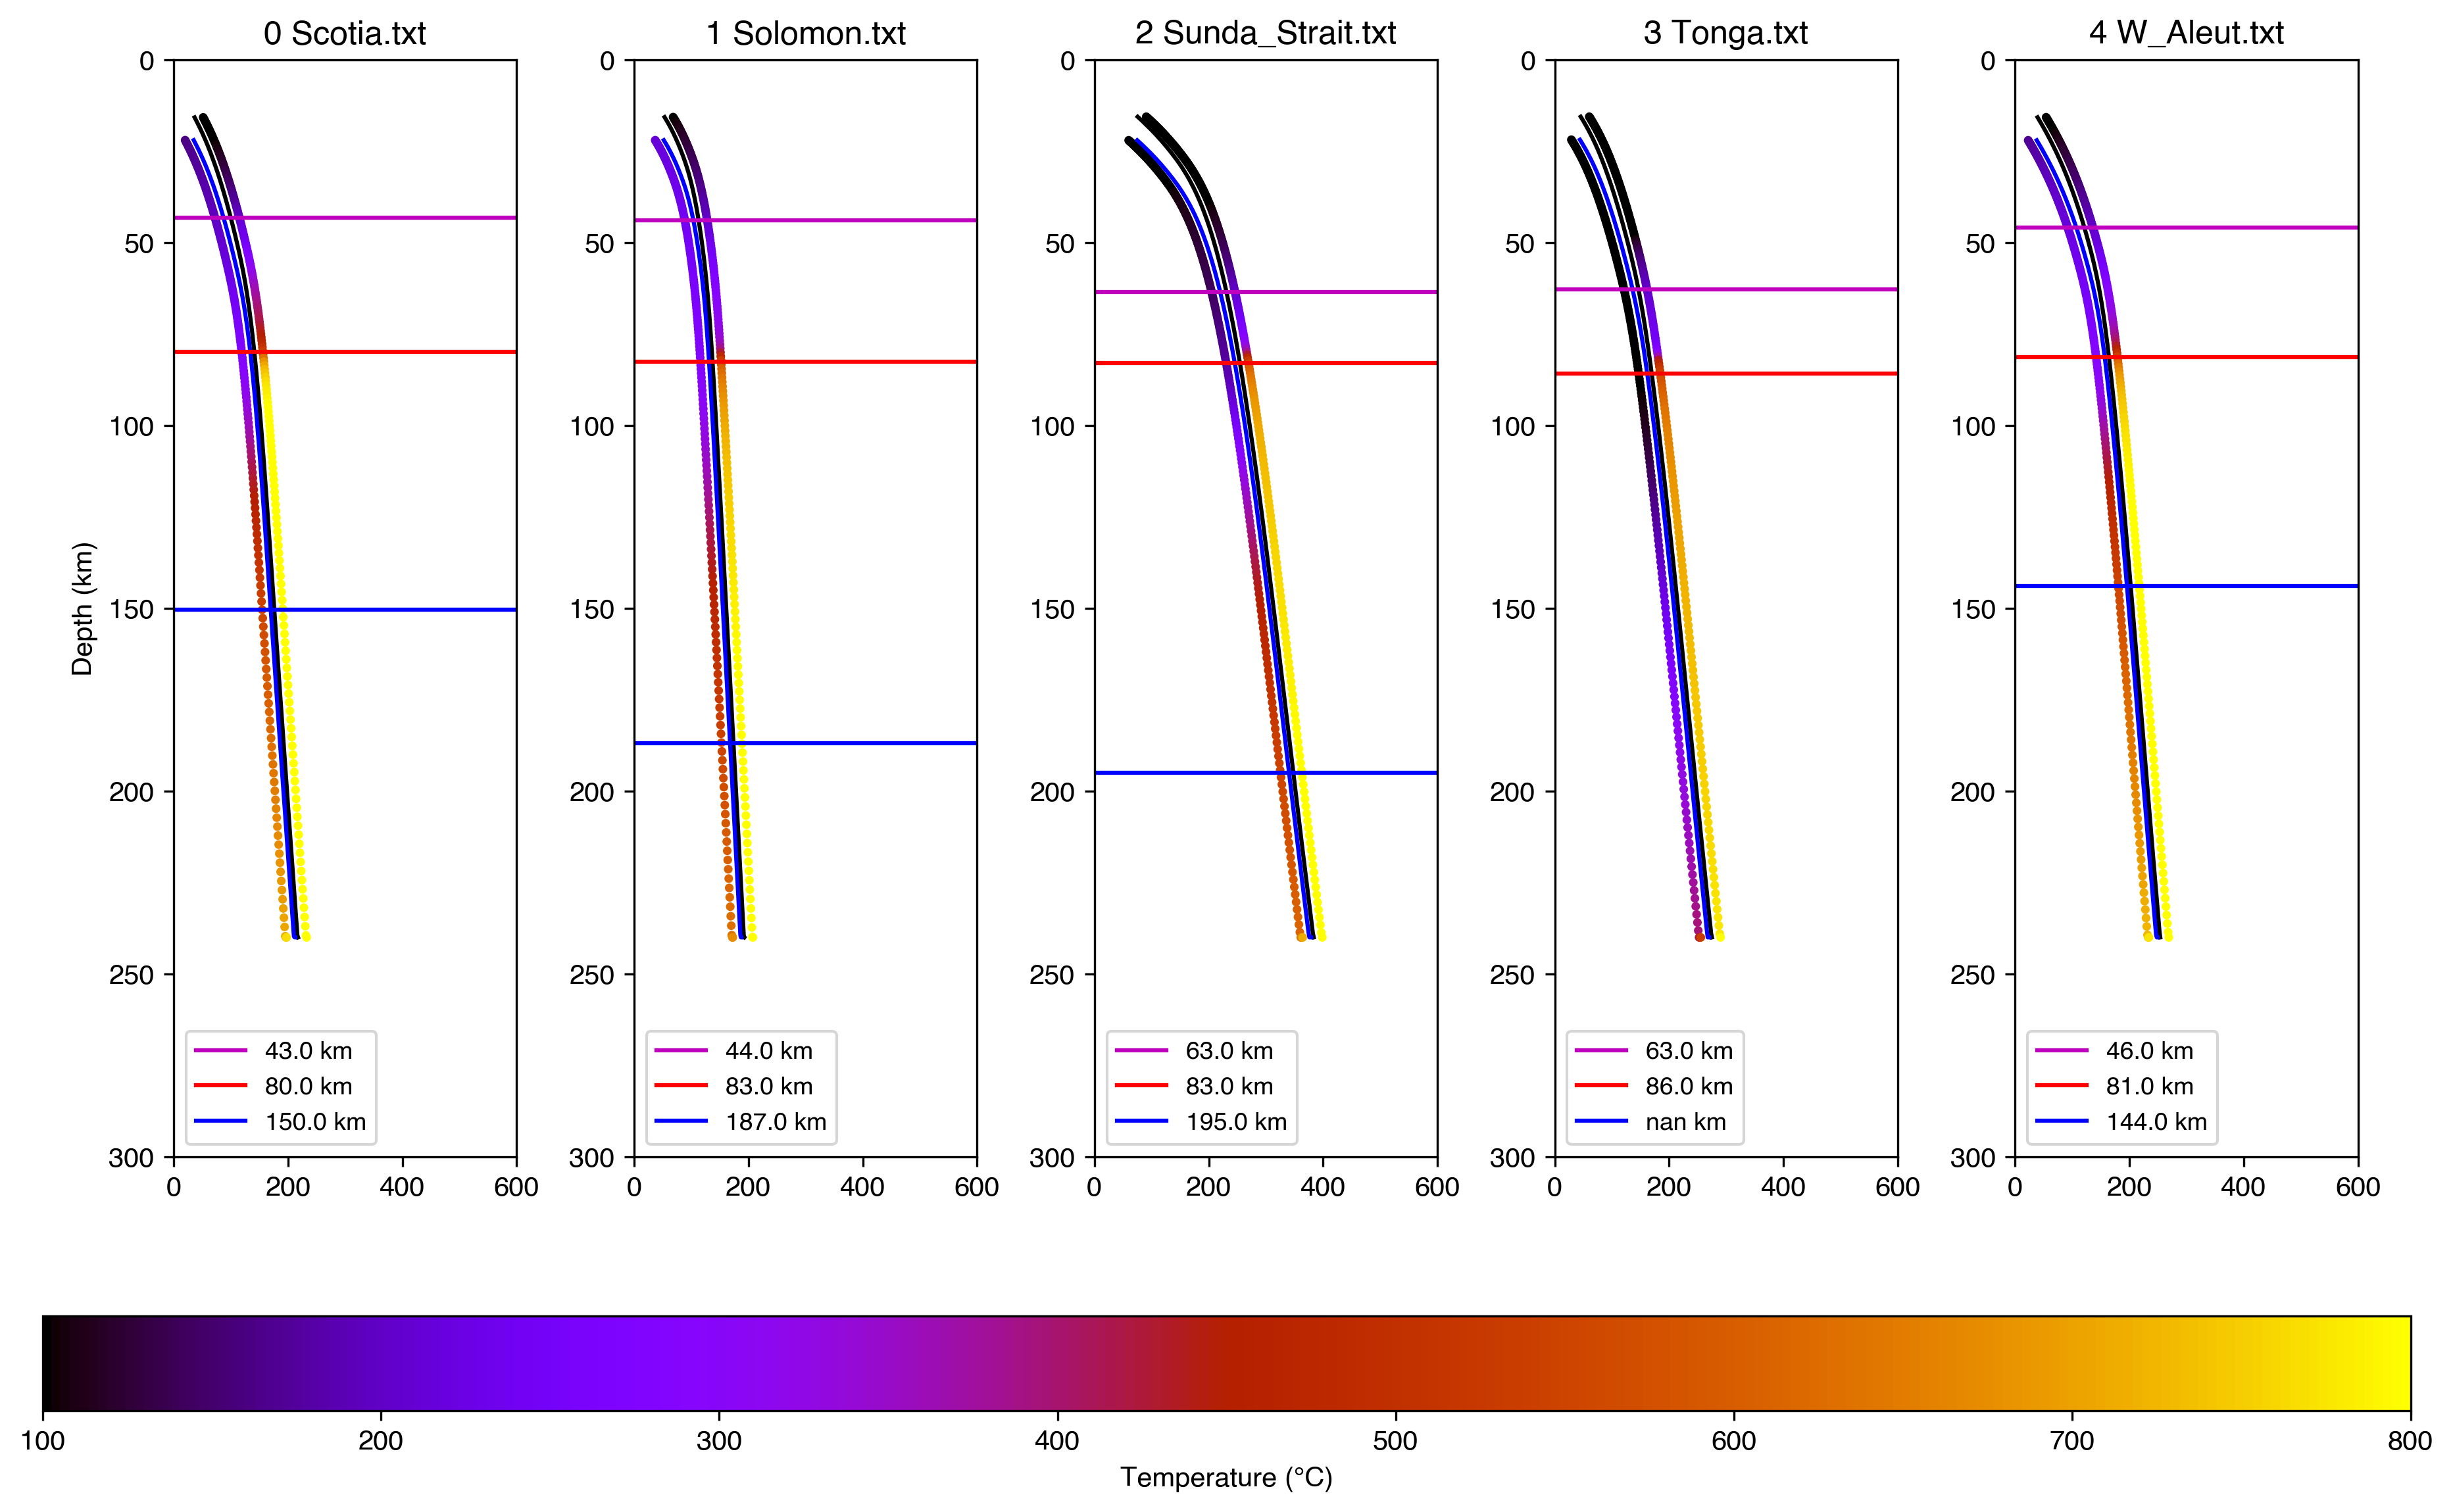

In [27]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

# Options for Model are:
#  - D80
#  - X25
#  - W1300
#  - T550
MODEL = 'D80'

SlabDir = '/Users/Andrew/Documents/Data/Merdith_sub_zones/syracuse_thermal/Syracuse++_supp_Material/models/%s' % MODEL

f=[]
for(dirpath,dirnames,filenames) in walk(SlabDir):
    f.extend(filenames)
    break
f.sort()
#print f

Shift=0

fig = plt.figure(figsize=(12,12),dpi=300)

MagnetiteIsoDepths = []
SurfaceCurieIsoDepths = []

#55 subduction zones
for j in np.arange(0,5):#len(filenames)):

    FNAME = f[j+50]

    fid=open(SlabDir+'/'+FNAME, 'r');

    SurfaceArray = [];
    MohoArray = [];

    for line in fid:
        #strip removes the '\n' at the end
        tline = line.strip()
        #print(tline[0])
        # Case where line contains the top surface of slab
        if '0' in tline[0]:
            tline = list(map(float, tline.split()))
            SurfaceArray.append(tline)
        # Case where line contains weird write statement text,
        # followed by values on next line
        #elif '7' in tline[0]:
        #    continue  # can skip this line, go to next
        else:
            tline = list(map(float, tline.split()))
            MohoArray.append(tline)

    SurfaceArray = np.asarray(SurfaceArray)
    MohoArray = np.asarray(MohoArray)
    #print MohoArray[:,2]

    #MohoInterpolator = interp1d(np.array(Moho)[:,0],np.array(Moho)[:,1],kind='linear',bounds_error=False)

    SurfaceCurieInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
    try:
        SurfaceCurieIsoDepth = SurfaceCurieInterpolator(550.)
    except:
        SurfaceCurieIsoDepth = np.nan
    MohoCurieInterpolator = interp1d(MohoArray[:,3],MohoArray[:,2],kind='linear')
    try:
        MohoCurieIsoDepth = MohoCurieInterpolator(550.)
    except:
        MohoCurieIsoDepth = np.nan
    MagnetiteInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
    try:
        MagnetiteIsoDepth = MagnetiteInterpolator(200.)
    except:
        MagnetiteIsoDepth = np.nan

    plt.subplot(2,5,j+1)
    plt.plot(SurfaceArray[:,1],SurfaceArray[:,2],'k')
    plt.plot(MohoArray[:,1],MohoArray[:,2],'b')
    plt.scatter(SurfaceArray[:,1]+15,SurfaceArray[:,2],10,c=SurfaceArray[:,3],\
                cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800)
    plt.scatter(MohoArray[:,1]-15,MohoArray[:,2],10,c=MohoArray[:,3],\
                cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800)
    ci1, = plt.plot([0,600],np.asarray([1,1])*SurfaceCurieIsoDepth,'r')
    ci2, = plt.plot([0,600],np.asarray([1,1])*MohoCurieIsoDepth,'b')
    ci0, = plt.plot([0,600],np.asarray([1,1])*MagnetiteIsoDepth,'m')
    #caxis([100,800])
    #set(gca,'ydir','reverse')
    if j > 49:   # If subplot is at bottom, print the xlabel
        plt.xlabel('Distance From Trench (km)')
    if j in np.arange(0,55,5):  # if subplot is in left-most column, print ylabel
        plt.ylabel('Depth (km)')
    plt.gca().set_xlim([0,600])
    plt.gca().set_ylim([0,300])
    plt.gca().invert_yaxis()
    plt.title(str(j) + ' ' + FNAME)

    ci0s = str(np.round(MagnetiteIsoDepth))+' km'
    ci1s = str(np.round(SurfaceCurieIsoDepth))+' km'
    ci2s = str(np.round(MohoCurieIsoDepth))+' km'
    lg=plt.legend([ci0,ci1,ci2],\
        [ci0s,ci1s,ci2s],\
        loc=3,fontsize=9);
    #lg.draw_frame(False)
    plt.tight_layout()

    SurfaceCurieIsoDepths.append(SurfaceCurieIsoDepth)
    MagnetiteIsoDepths.append(MagnetiteIsoDepth)
#[left, bottom, width, height]
cax = fig.add_axes([0, 0.4, 1, 0.04])
cbar = plt.colorbar(cax=cax, orientation='horizontal')
cbar.set_label('Temperature (°C)')

In [28]:
#comparisons

In [29]:
import xarray as xr
import rockhound as rh
from rockhound.slab2 import ZONES
import pygmt
import sys
sys.path.insert(1, '/Users/andrew/Documents/python/pygplates_rev28_python37_MacOS64')
import pygplates
import cartopy.crs as ccrs
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
# Fetch all Slab2 subduction zones and add them inside a list
subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))
# Get min and max values of the subducting plates' depths
vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])

In [30]:
ZONES.keys()

dict_keys(['alaska', 'calabria', 'caribbean', 'cascadia', 'central_america', 'cotabalo', 'halmahera', 'hellenic', 'himalaya', 'hindu_kush', 'izu_bonin', 'kamchatka', 'kermadec', 'makran', 'manila_trench', 'muertos_trough', 'new_guinea', 'pamir', 'philippines', 'puysegur', 'ryukyu', 'scotia_sea', 'solomon_islands', 'south_america', 'sulawesi', 'sumatra_java', 'vanuatu'])

In [31]:
#Load sample grid and point datasets, use rockhound
SAM = rh.fetch_slab2('south_america')
IZB = rh.fetch_slab2('izu_bonin')
SJV = rh.fetch_slab2('sumatra_java')
CAS = rh.fetch_slab2('cascadia')
HEL = rh.fetch_slab2('hellenic')
CAL = rh.fetch_slab2('calabria')
RYU = rh.fetch_slab2('ryukyu')
JAP = rh.fetch_slab2('kamchatka')
#get depth
grid = SAM.depth
grid_uncertainty = SAM.depth_uncertainty

In [32]:
#here we define our cross section, we have 40 points, some will returns nans though
#Chile: [-25,-25], [280,300]
#Bonin: [30,30], [160,120]
#Peru: [-8,-8], [275,295]
#sumutra-java: [-10,2],[98,107]
#CAS: [40,50], [220, 240]
#CAL:[37,41],[20,10]
#RYU:[31,37],[135,130]
#JAP:[41,48],[148,130]
#lat = [-25]*40
#lon = np.linspace(280, 300, 40)
steps = 100
lat = np.linspace(-25,-25, int(steps))
lon = np.linspace(280,300, int(steps))
#pygmt track needs lon/lat as separate columns in pandas dataframe
d = { 'lon': lon,'lat': lat}
points = pd.DataFrame(data=d)

# Sample the sub zone using grdtrack. It returns a dataframe with a new column and the results
track = pygmt.grdtrack(points=points, grid=grid, newcolname='depth')
track_uncertain = pygmt.grdtrack(points=points, grid=grid_uncertainty, newcolname='depth_uncertainty')
#the df will contain some NaNs that we want to filtertrack
track_dropna = track.dropna()
track_uncertain_dropna = track_uncertain.dropna()

In [33]:
#use haversine formula to convert to km
#get distance, equally spaced so we can define at the start
lat1 = track_dropna['lat'].values[0]
lat2 = track_dropna['lat'].values[1]
lon1 = track_dropna['lon'].values[0]
lon2 = track_dropna['lon'].values[1]
# convert decimal degrees to radians 
lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

# haversine formula 
dlon = lon2 - lon1
dlat = lat2 - lat1 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2

c = 2 * np.arcsin(np.sqrt(a)) 
r = 6371 # Radius of earth in kilometers. Use 3956 for miles

distance = c*r

#get the incremental range
distance_range = []
for i in range(track_dropna['depth'].count()):

    distance_range.append(i*distance)


In [34]:
def find_with_list(myList, target):
    inds = []
    for i in range(len(myList)):
        if myList[i] == target:
            inds += i,
    return inds

In [35]:
arcs = []
f.sort()
for file in f:
    arcs.append(file.split('.')[0])

In [36]:
df = pd.read_csv('/Users/Andrew/Documents/Data/Merdith_sub_zones/syracuse_thermal/Table_2_sub_parameters.csv')

In [37]:
input_lat = np.mean(lat)
input_lon = np.mean(lon)
if input_lon > 180:
    input_lon = input_lon-360
#get closest based on lat
df_sort = df.iloc[(df['Lat']-int(input_lat)).abs().argsort()[:10]]
#now cross check for long
df_closest = df_sort.iloc[(df_sort['Lon']-int(input_lon)).abs().argsort()[:1]]
print(df_closest['Name'])
#to get index
closest_index = df_closest.index.tolist()


7    C_Chile_gap
Name: Name, dtype: object


In [38]:
index_of_closest = find_with_list(arcs, df_closest['Name'].values[0])


In [40]:
#get data of our closest match
FNAME = f[index_of_closest[0]]

fid=open(SlabDir+'/'+FNAME, 'r');

SurfaceArray = [];
MohoArray = [];

for line in fid:
    #strip removes the '\n' at the end
    tline = line.strip()
    #print(tline[0])
    # Case where line contains the top surface of slab
    if '0' in tline[0]:
        tline = list(map(float, tline.split()))
        SurfaceArray.append(tline)
    # Case where line contains weird write statement text,
    # followed by values on next line
    #elif '7' in tline[0]:
    #    continue  # can skip this line, go to next
    else:
        tline = list(map(float, tline.split()))
        MohoArray.append(tline)

SurfaceArray = np.asarray(SurfaceArray)
MohoArray = np.asarray(MohoArray)
#print MohoArray[:,2]

#MohoInterpolator = interp1d(np.array(Moho)[:,0],np.array(Moho)[:,1],kind='linear',bounds_error=False)

SurfaceCurieInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
try:
    SurfaceCurieIsoDepth = SurfaceCurieInterpolator(550.)
except:
    SurfaceCurieIsoDepth = np.nan
MohoCurieInterpolator = interp1d(MohoArray[:,3],MohoArray[:,2],kind='linear')
try:
    MohoCurieIsoDepth = MohoCurieInterpolator(550.)
except:
    MohoCurieIsoDepth = np.nan
MagnetiteInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
try:
    MagnetiteIsoDepth = MagnetiteInterpolator(200.)
except:
    MagnetiteIsoDepth = np.nan

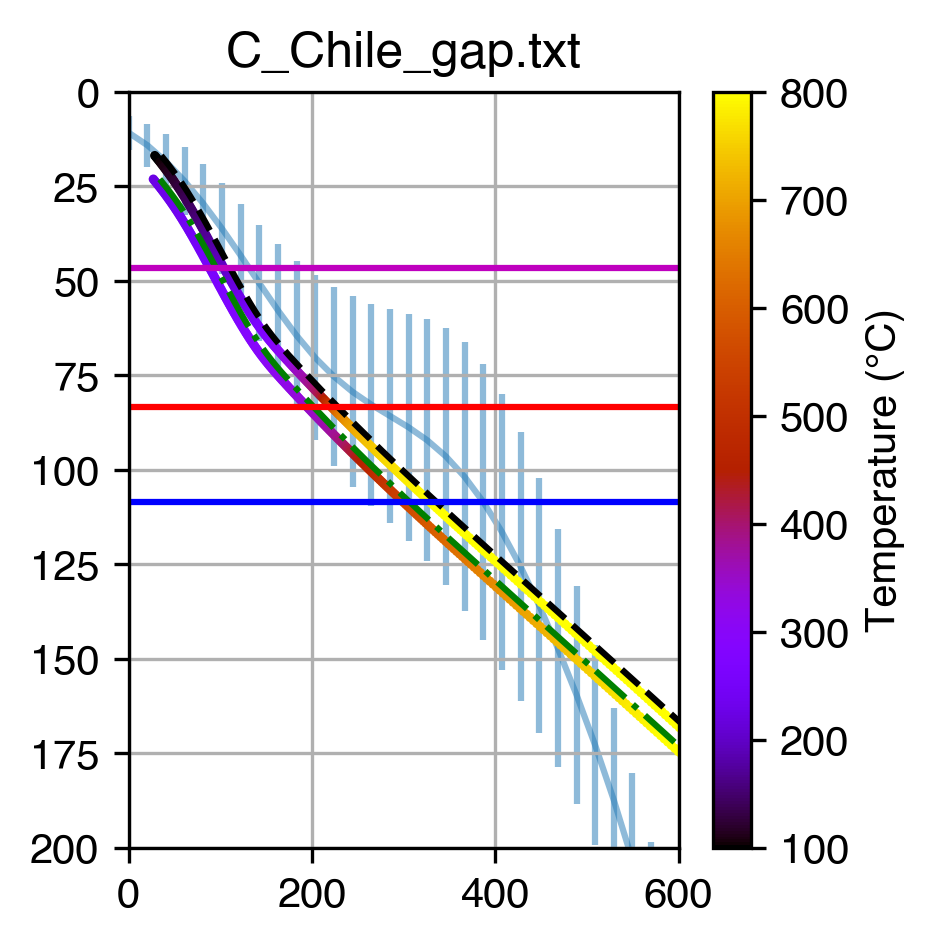

In [44]:
fig = plt.figure(figsize=(14,32),dpi=300)
plt.subplot(11,5,j+1)
plt.plot(SurfaceArray[:,1],SurfaceArray[:,2],'k',ls='--', zorder=2)
plt.plot(MohoArray[:,1],MohoArray[:,2],'g',ls='-.', zorder=2)
plt.scatter(SurfaceArray[:,1]-7,SurfaceArray[:,2],5,c=SurfaceArray[:,3],\
            cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800, zorder=2)
plt.scatter(MohoArray[:,1]-7,MohoArray[:,2],5,c=MohoArray[:,3],\
            cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800, zorder=2)

#plt.scatter(np.asarray(distance_range),
#            track_dropna['depth'].values*-.001)
#plt.plot(np.asarray(distance_range),
#            track_dropna['depth'].values*-.001)
plt.errorbar(np.asarray(distance_range),
            track_dropna['depth'].values*-.001,
            yerr=track_uncertain_dropna['depth_uncertainty'].values*-.001,
            alpha=0.5, zorder=1)


ci1, = plt.plot([0,600],np.asarray([1,1])*SurfaceCurieIsoDepth,'r')
ci2, = plt.plot([0,600],np.asarray([1,1])*MohoCurieIsoDepth,'b')
ci0, = plt.plot([0,600],np.asarray([1,1])*MagnetiteIsoDepth,'m')
#caxis([100,800])
#set(gca,'ydir','reverse')
if j > 49:   # If subplot is at bottom, print the xlabel
    plt.xlabel('Distance From Trench (km)')
if j in np.arange(0,55,5):  # if subplot is in left-most column, print ylabel
    plt.ylabel('Depth (km)')
plt.gca().set_xlim([0,600])
plt.gca().set_ylim([0,200])
plt.gca().invert_yaxis()
plt.title(FNAME)

#ci0s = str(np.round(MagnetiteIsoDepth))+' km'
#ci1s = str(np.round(SurfaceCurieIsoDepth))+' km'
#ci2s = str(np.round(MohoCurieIsoDepth))+' km'
#lg=plt.legend([ci0,ci1,ci2],\
#    [ci0s,ci1s,ci2s],\
#    loc=3,fontsize=9);
cbar = plt.colorbar()
cbar.set_label('Temperature (°C)')
plt.tight_layout()
plt.grid()
SurfaceCurieIsoDepths.append(SurfaceCurieIsoDepth)
MagnetiteIsoDepths.append(MagnetiteIsoDepth)
#[left, bottom, width, height]
plot_savedir = '/Users/andrew/Documents/scripts_output/serpentinte_subduction_zones'

plt.savefig('%s/SYR10_example.pdf' % plot_savedir)

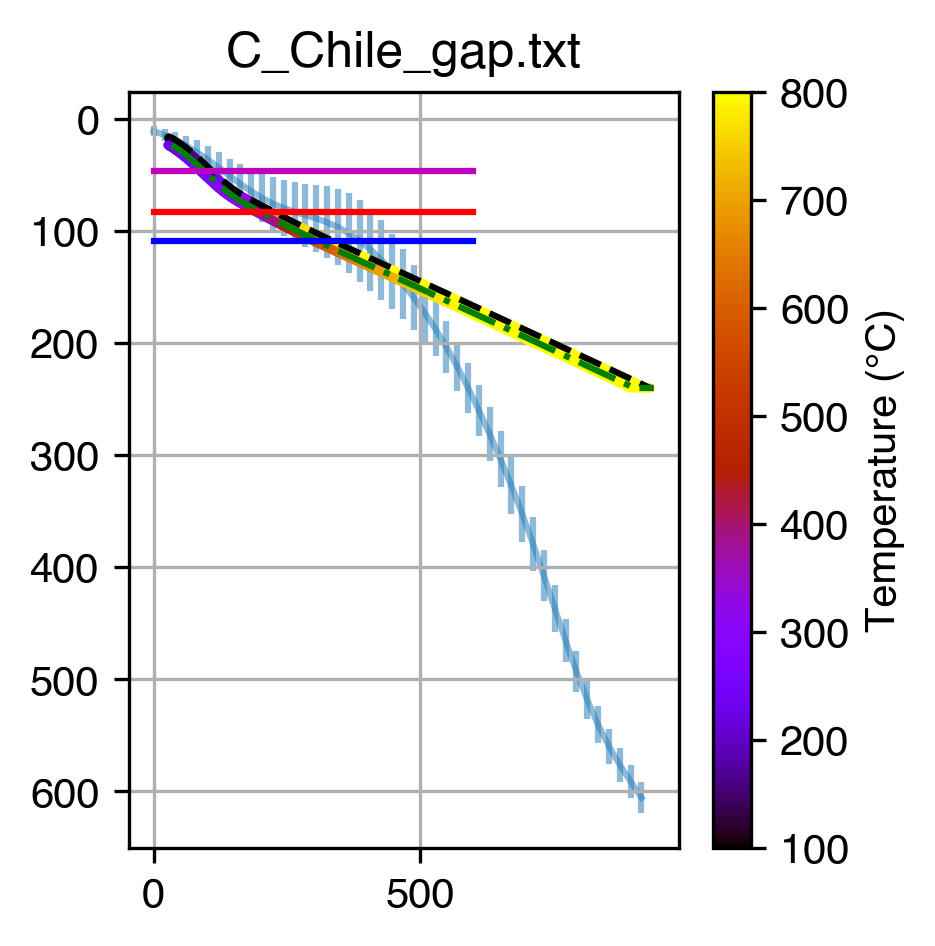

In [43]:
fig = plt.figure(figsize=(14,32),dpi=300)
plt.subplot(11,5,j+1)
plt.plot(SurfaceArray[:,1],SurfaceArray[:,2],'k',ls='--', zorder=2)
plt.plot(MohoArray[:,1],MohoArray[:,2],'g',ls='-.', zorder=2)
plt.scatter(SurfaceArray[:,1]-7,SurfaceArray[:,2],5,c=SurfaceArray[:,3],\
            cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800, zorder=2)
plt.scatter(MohoArray[:,1]-7,MohoArray[:,2],5,c=MohoArray[:,3],\
            cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800, zorder=2)

#plt.scatter(np.asarray(distance_range),
#            track_dropna['depth'].values*-.001)
#plt.plot(np.asarray(distance_range),
#            track_dropna['depth'].values*-.001)
plt.errorbar(np.asarray(distance_range),
            track_dropna['depth'].values*-.001,
            yerr=track_uncertain_dropna['depth_uncertainty'].values*-.001,
            alpha=0.5, zorder=1)


ci1, = plt.plot([0,600],np.asarray([1,1])*SurfaceCurieIsoDepth,'r')
ci2, = plt.plot([0,600],np.asarray([1,1])*MohoCurieIsoDepth,'b')
ci0, = plt.plot([0,600],np.asarray([1,1])*MagnetiteIsoDepth,'m')
#caxis([100,800])
#set(gca,'ydir','reverse')
if j > 49:   # If subplot is at bottom, print the xlabel
    plt.xlabel('Distance From Trench (km)')
if j in np.arange(0,55,5):  # if subplot is in left-most column, print ylabel
    plt.ylabel('Depth (km)')
#plt.gca().set_xlim([0,600])
#plt.gca().set_ylim([0,150])
plt.gca().invert_yaxis()
plt.title(FNAME)

#ci0s = str(np.round(MagnetiteIsoDepth))+' km'
#ci1s = str(np.round(SurfaceCurieIsoDepth))+' km'
#ci2s = str(np.round(MohoCurieIsoDepth))+' km'
#lg=plt.legend([ci0,ci1,ci2],\
#    [ci0s,ci1s,ci2s],\
#    loc=3,fontsize=9);
cbar = plt.colorbar()
cbar.set_label('Temperature (°C)')
plt.tight_layout()
plt.grid()
SurfaceCurieIsoDepths.append(SurfaceCurieIsoDepth)
MagnetiteIsoDepths.append(MagnetiteIsoDepth)
#[left, bottom, width, height]

plot_savedir = '/Users/andrew/Documents/scripts_output/serpentinte_subduction_zones'

plt.savefig('%s/SYR10_example.pdf' % plot_savedir)

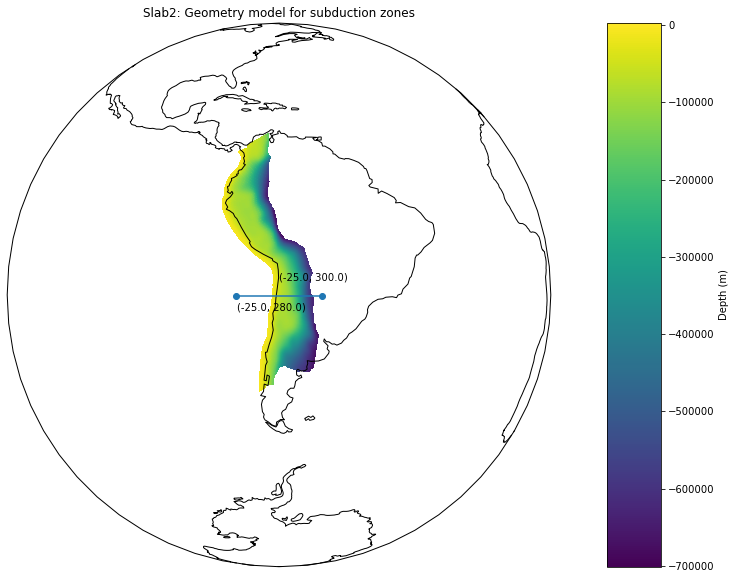

In [23]:
#plot cross section map
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=np.mean(lon), central_latitude=np.mean(lat)))
#grid = grid * -0.001
pc = grid.plot.pcolormesh(ax=ax,
        transform=ccrs.PlateCarree(),
        add_colorbar=False,
        vmin=vmin,
        vmax=vmax)
ax.set_title("Slab2: Geometry model for subduction zones")
plt.colorbar(
    pc,
    ax=ax,
    label='Depth (m)',
    pad=0.05,
    aspect=10,
    shrink=1,
    orientation="vertical",
)


ax.scatter([lon[0], lon[-1]],
           [lat[0], lat[-1]],transform=ccrs.PlateCarree())
ax.plot([lon[0], lon[-1]],
        [lat[0], lat[-1]],transform=ccrs.PlateCarree())
point_one = (lat[0], lon[0])
point_two = (lat[-1], lon[-1])
ax.text(lon[0], lat[0]-3, str(point_one),transform=ccrs.PlateCarree())
ax.text(lon[-1]-10, lat[-1]+3, str(point_two),transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.grid()
plt.show()